学习R语言机器学习的基础知识。

# 数据预处理

## 加载数据并查看数据

In [3]:
library(AppliedPredictiveModeling)
library(caret)
library(tidyverse)

Loading required package: ggplot2

Loading required package: lattice

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v lubridate 1.9.4     v tibble    3.2.1
v purrr     1.0.4     v tidyr     1.3.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x purrr::lift()   masks caret::lift()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
data("segmentationOriginal")

In [5]:
str(segmentationOriginal)

'data.frame':	2019 obs. of  119 variables:
 $ Cell                         : int  207827637 207932307 207932463 207932470 207932455 207827656 207827659 207827661 207932479 207932480 ...
 $ Case                         : Factor w/ 2 levels "Test","Train": 1 2 2 2 1 1 1 1 1 1 ...
 $ Class                        : Factor w/ 2 levels "PS","WS": 1 1 2 1 1 2 2 1 2 2 ...
 $ AngleCh1                     : num  143.25 133.75 106.65 69.15 2.89 ...
 $ AngleStatusCh1               : int  1 0 0 0 2 2 1 1 2 1 ...
 $ AreaCh1                      : int  185 819 431 298 285 172 177 251 495 384 ...
 $ AreaStatusCh1                : int  0 1 0 0 0 0 0 0 0 0 ...
 $ AvgIntenCh1                  : num  15.7 31.9 28 19.5 24.3 ...
 $ AvgIntenCh2                  : num  3.95 205.88 115.32 101.29 111.42 ...
 $ AvgIntenCh3                  : num  9.55 69.92 63.94 28.22 20.47 ...
 $ AvgIntenCh4                  : num  2.21 164.15 106.7 31.03 40.58 ...
 $ AvgIntenStatusCh1            : int  0 0 0 0 0 1 1 0 0 0 ...

In [6]:
segData <- subset(segmentationOriginal, Case == "Train")
cellID <- segData$Cell
calss <- segData$Class
case <- segData$Case
segData <- segData[ ,  -(1:3)]
statusColNum <- grep("Status", names(segData))
statusColNum

[1]   2   4   9  10  11  12  14  16  20  21  22  26  27  28  30  32  34  36  38
[20]  40  43  44  46  48  51  52  55  56  59  60  63  64  68  69  70  72  73  74
[39]  76  78  80  82  84  86  88  92  93  94  97  98 103 104 105 106 110 111 112
[58] 114

In [7]:
segData <- segData[ , -statusColNum]

# 查看数据结构
str(segData)

'data.frame':	1009 obs. of  58 variables:
 $ AngleCh1               : num  133.8 106.6 69.2 109.4 104.3 ...
 $ AreaCh1                : int  819 431 298 256 258 358 158 315 246 223 ...
 $ AvgIntenCh1            : num  31.9 28 19.5 18.8 17.6 ...
 $ AvgIntenCh2            : num  206 115 101 126 124 ...
 $ AvgIntenCh3            : num  69.9 63.9 28.2 13.6 22.5 ...
 $ AvgIntenCh4            : num  164.2 106.7 31 46.8 71.2 ...
 $ ConvexHullAreaRatioCh1 : num  1.26 1.05 1.2 1.08 1.08 ...
 $ ConvexHullPerimRatioCh1: num  0.797 0.935 0.866 0.92 0.931 ...
 $ DiffIntenDensityCh1    : num  31.9 32.5 26.7 28 27.9 ...
 $ DiffIntenDensityCh3    : num  43.1 36 22.9 14.9 16.1 ...
 $ DiffIntenDensityCh4    : num  79.3 51.4 26.4 32.7 36.2 ...
 $ EntropyIntenCh1        : num  6.09 5.88 5.42 5.38 5.18 ...
 $ EntropyIntenCh3        : num  6.64 6.68 5.44 4.15 5.49 ...
 $ EntropyIntenCh4        : num  7.88 7.14 5.78 6.19 6.62 ...
 $ EqCircDiamCh1          : num  32.3 23.4 19.5 18.1 18.2 ...
 $ EqEllipseLWRCh

In [8]:
library(skimr)
skim(segData) %>%print()

-- Data Summary ------------------------
                           Values 
Name                       segData
Number of rows             1009   
Number of columns          58     
_______________________           
Column type frequency:            
  numeric                  58     
________________________          
Group variables            None   

-- Variable type: numeric ------------------------------------------------------
   skim_variable           n_missing complete_rate       mean         sd
 1 AngleCh1                        0             1    91.1       48.9   
 2 AreaCh1                         0             1   325.       217.    
 3 AvgIntenCh1                     0             1   128.       164.    
 4 AvgIntenCh2                     0             1   185.       154.    
 5 AvgIntenCh3                     0             1    96.1       93.5   
 6 AvgIntenCh4                     0             1   140.       149.    
 7 ConvexHullAreaRatioCh1          0             1 

In [9]:
library(modelsummary)
datasummary_skim(segData)


+-------------------------+--------+--------------+---------+---------+--------+---------+----------+---------------------------------------------------------------+
|                         | Unique | Missing Pct. | Mean    | SD      | Min    | Median  | Max      | Histogram                                                     |
+=========================+========+==============+=========+=========+========+=========+==========+===============================================================+
| AngleCh1                | 1009   | 0            | 91.1    | 48.9    | 0.0    | 90.0    | 179.9    | ![](tinytable_assets/idkb1ia35g95vvuvhdc6jg.png){ height=16 } |
+-------------------------+--------+--------------+---------+---------+--------+---------+----------+---------------------------------------------------------------+
| AreaCh1                 | 399    | 0            | 325.1   | 216.6   | 150.0  | 256.0   | 2186.0   | ![](tinytable_assets/idubqqza6sl75qimmv5ldf.png){ height=16 } |
+--

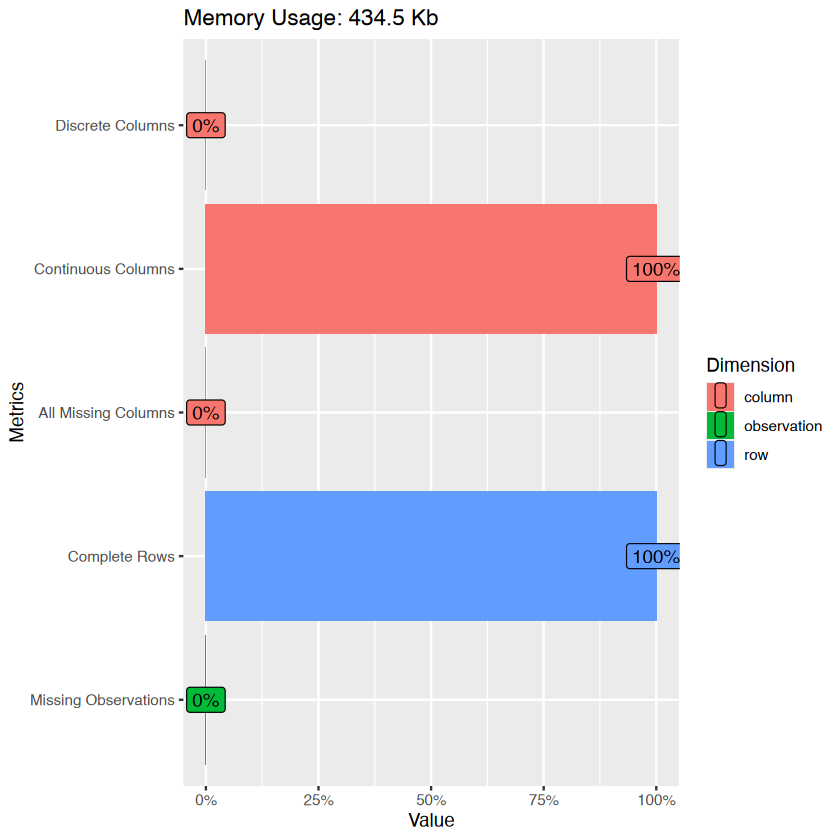

In [10]:
library(DataExplorer)
plot_intro(segData)

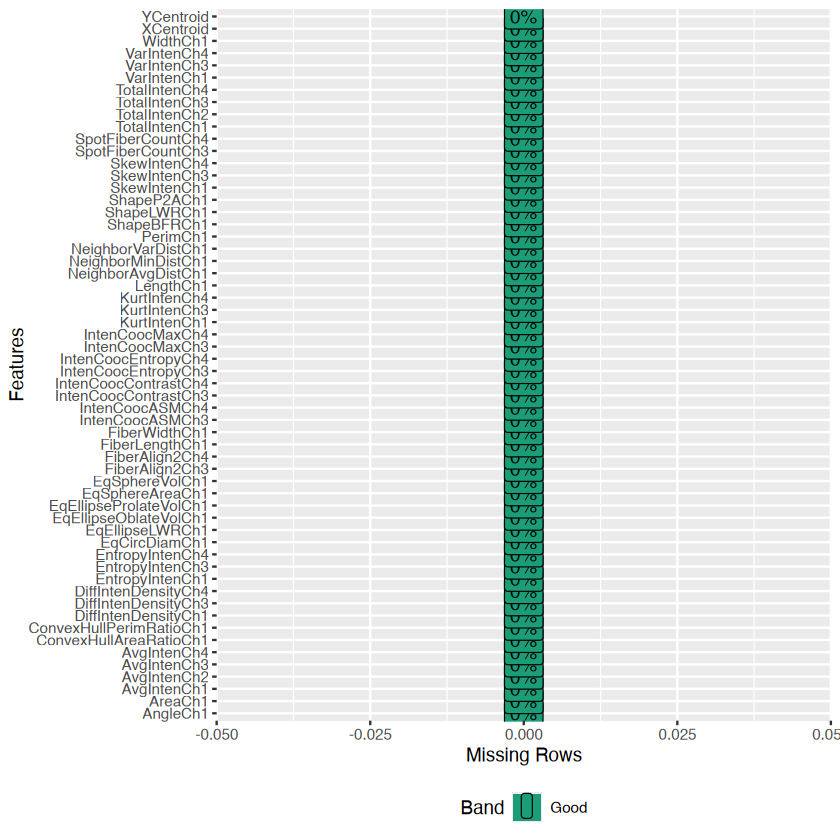

In [11]:
plot_missing(segData)

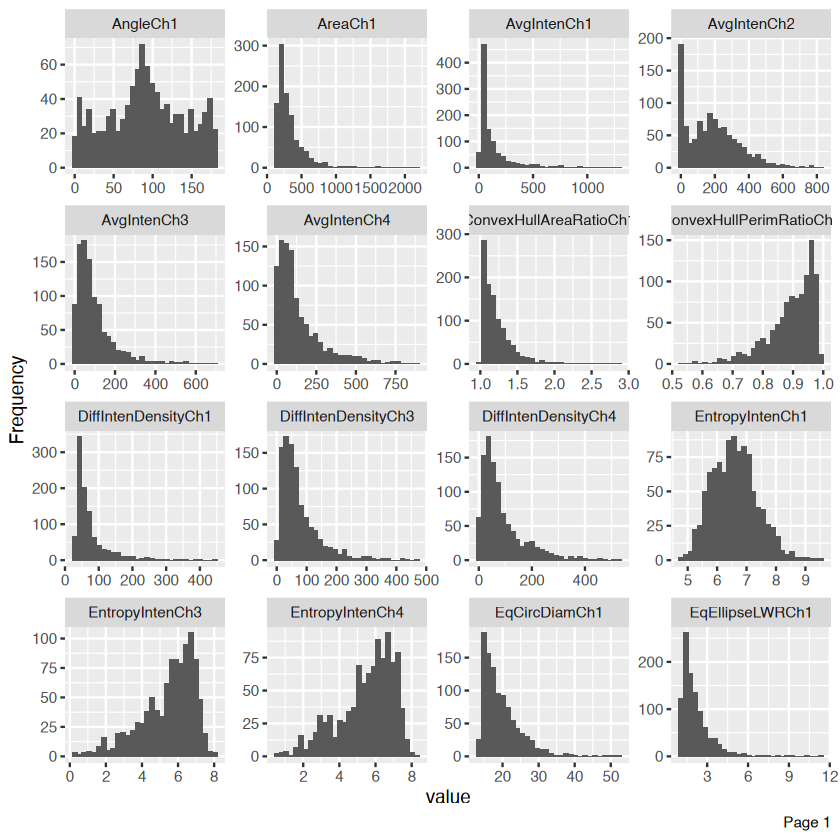

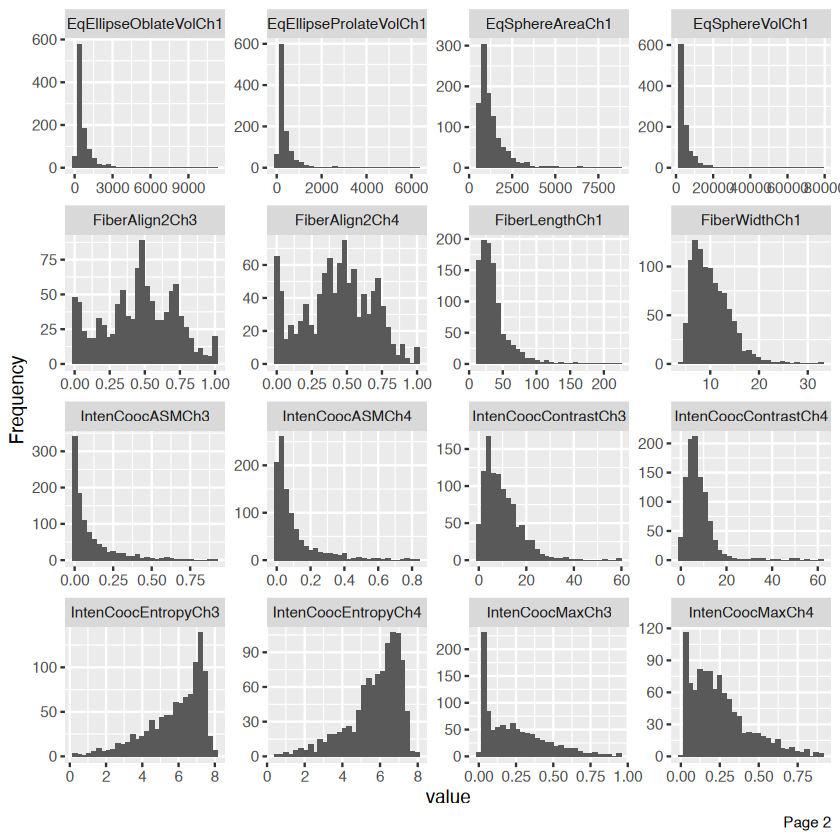

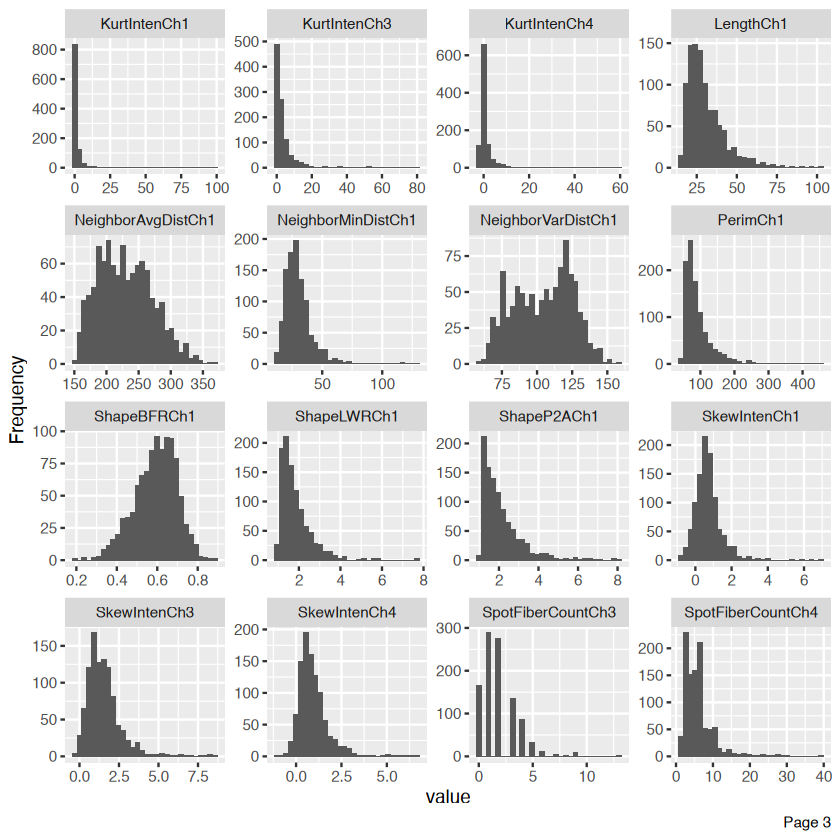

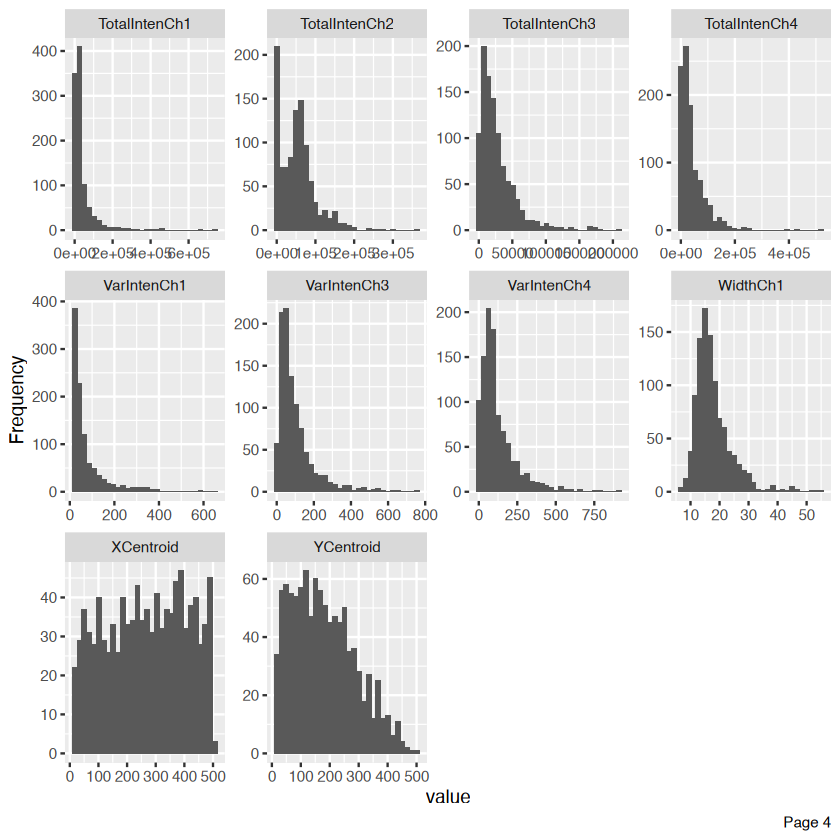

In [12]:
plot_histogram(segData)

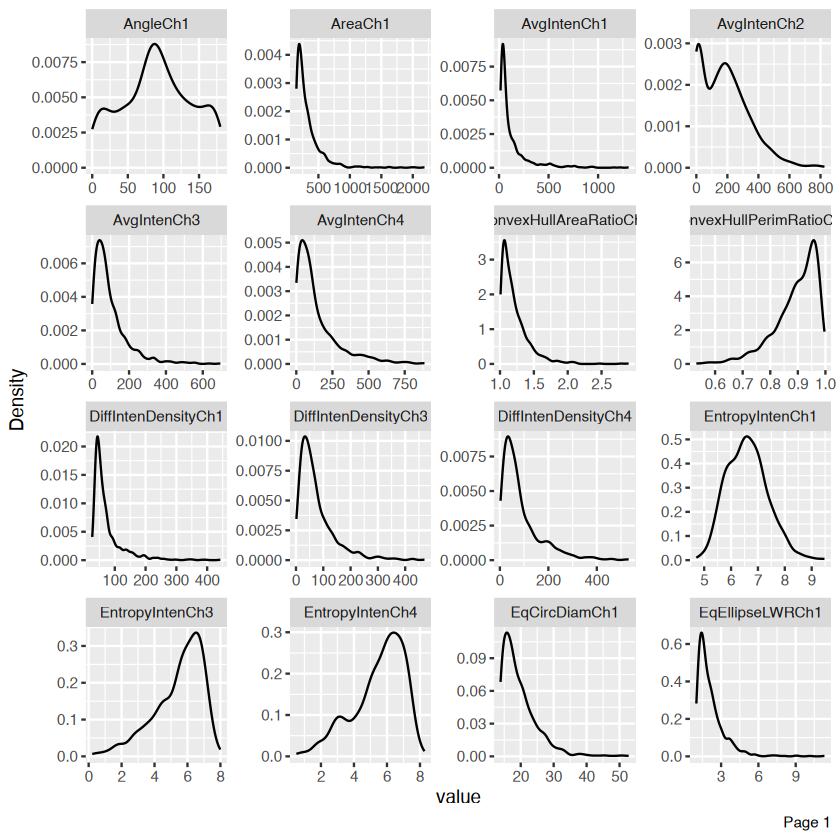

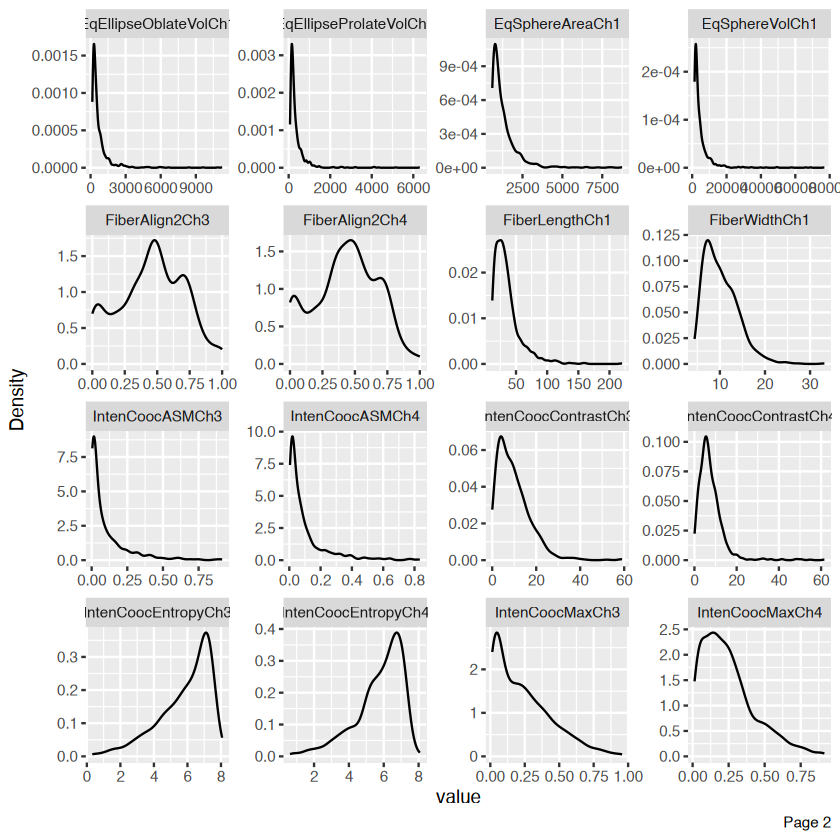

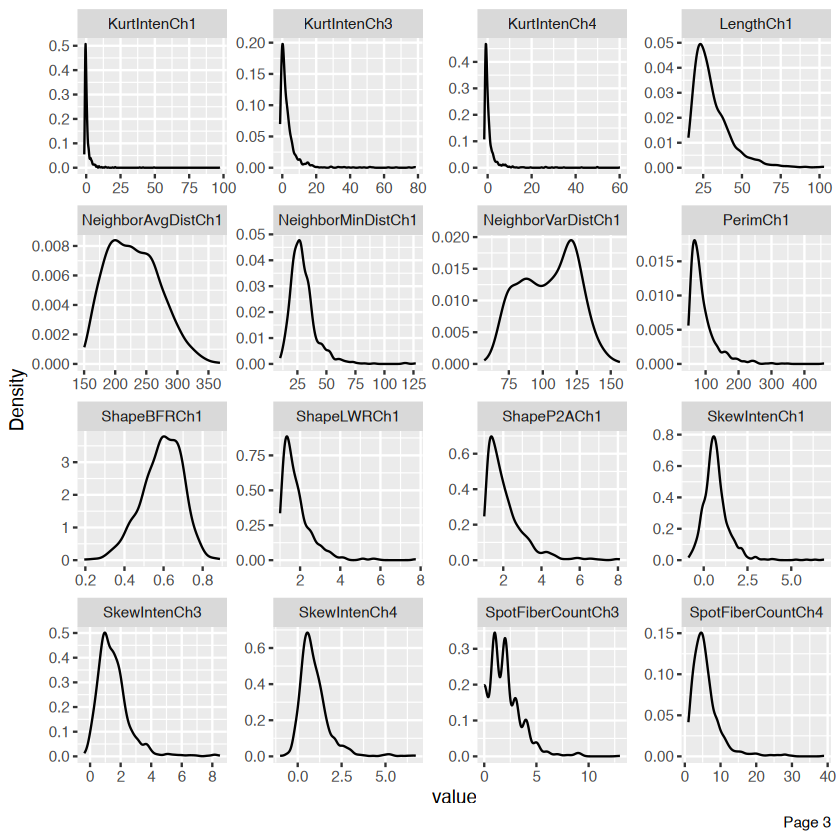

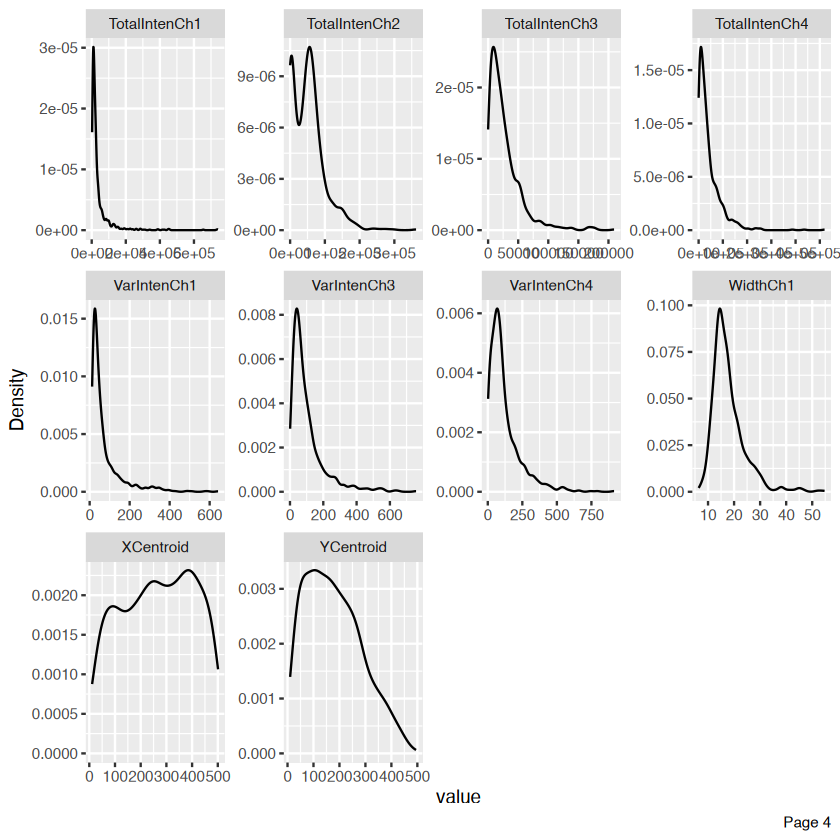

In [13]:
plot_density(segData)

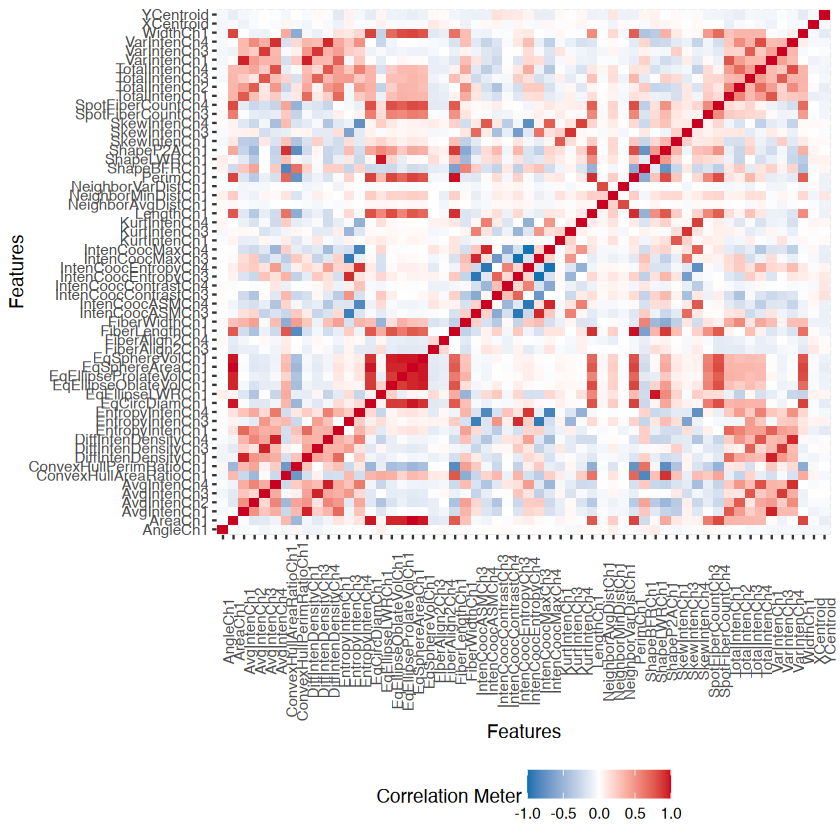

In [14]:
plot_correlation(segData)

## 中心化与标准化

In [15]:
scaled <- scale(segData[, c(1, 4)], center = TRUE, scale = FALSE)
head(scaled)

,AngleCh1,AvgIntenCh2
2,42.62563,20.68784
3,15.51998,-69.87514
4,-21.97608,-83.89594
12,18.29002,-59.25190
15,13.15225,-60.82225
16,-13.13447,31.94090


In [16]:
datasummary_skim(data.frame(scaled))


+-------------+--------+--------------+------+-------+--------+--------+-------+---------------------------------------------------------------+
|             | Unique | Missing Pct. | Mean | SD    | Min    | Median | Max   | Histogram                                                     |
+=============+========+==============+======+=======+========+========+=======+===============================================================+
| AngleCh1    | 1009   | 0            | -0.0 | 48.9  | -91.1  | -1.1   | 88.8  | ![](tinytable_assets/idbwut2vc5145jqj99jy99.png){ height=16 } |
+-------------+--------+--------------+------+-------+--------+--------+-------+---------------------------------------------------------------+
| AvgIntenCh2 | 1008   | 0            | 0.0  | 154.0 | -185.2 | -12.5  | 640.3 | ![](tinytable_assets/idj3se0wfsoqvyg7kjj1df.png){ height=16 } |
+-------------+--------+--------------+------+-------+--------+--------+-------+-------------------------------------------------

In [17]:
scaled <- scale(segData[, c(1, 4)], center = TRUE, scale = TRUE)
head(scaled)

,AngleCh1,AvgIntenCh2
2,0.8714777,0.1343483
3,0.3173048,-0.4537741
4,-0.4492993,-0.5448262
12,0.3739380,-0.3847860
15,0.2688966,-0.3949840
16,-0.2685331,0.2074265


In [18]:
datasummary_skim(data.frame(scaled))


+-------------+--------+--------------+------+-----+------+--------+-----+---------------------------------------------------------------+
|             | Unique | Missing Pct. | Mean | SD  | Min  | Median | Max | Histogram                                                     |
+=============+========+==============+======+=====+======+========+=====+===============================================================+
| AngleCh1    | 1009   | 0            | -0.0 | 1.0 | -1.9 | -0.0   | 1.8 | ![](tinytable_assets/id7r1hssyd75o2j9waqmdy.png){ height=16 } |
+-------------+--------+--------------+------+-----+------+--------+-----+---------------------------------------------------------------+
| AvgIntenCh2 | 1008   | 0            | 0.0  | 1.0 | -1.2 | -0.1   | 4.2 | ![](tinytable_assets/idzy8n6ti1gowwowcv9n7t.png){ height=16 } |
+-------------+--------+--------------+------+-----+------+--------+-----+---------------------------------------------------------------+ 

## 偏度问题

In [19]:
e1071::skewness(segData[, 1])

[1] -0.02426252

In [20]:
skew_values <- apply(segData, 2, e1071::skewness)
print(skew_values)

               AngleCh1                 AreaCh1             AvgIntenCh1 
            -0.02426252              3.52510745              2.95918524 
            AvgIntenCh2             AvgIntenCh3             AvgIntenCh4 
             0.84816033              2.20234214              1.90047128 
 ConvexHullAreaRatioCh1 ConvexHullPerimRatioCh1     DiffIntenDensityCh1 
             2.47658194             -1.30409896              2.76047338 
    DiffIntenDensityCh3     DiffIntenDensityCh4         EntropyIntenCh1 
             2.08518782              1.89923287              0.39789483 
        EntropyIntenCh3         EntropyIntenCh4           EqCircDiamCh1 
            -1.00295336             -0.82790492              1.95553035 
        EqEllipseLWRCh1   EqEllipseOblateVolCh1  EqEllipseProlateVolCh1 
             2.69399392              5.48931343              6.07083432 
        EqSphereAreaCh1          EqSphereVolCh1          FiberAlign2Ch3 
             3.52514046              5.73950155    

In [21]:
# 偏度
psych::skew(segData[, 1])

[1] -0.02426252

In [22]:
# 峰度
psych::kurtosi(segData[, 1])

[1] -0.8594789

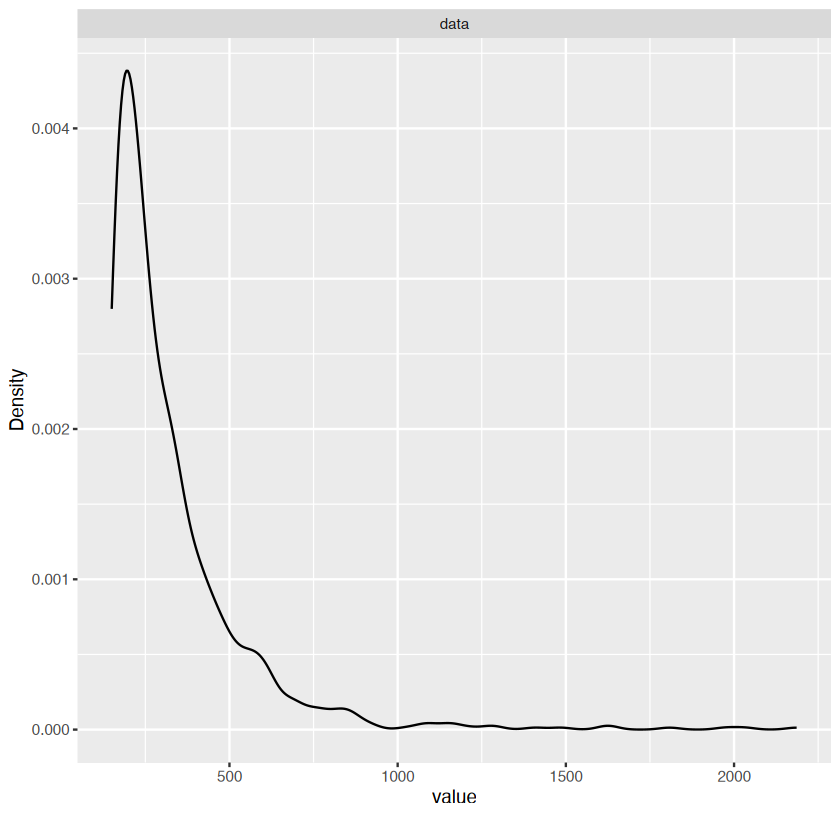

In [23]:
plot_density(segData[, 2])

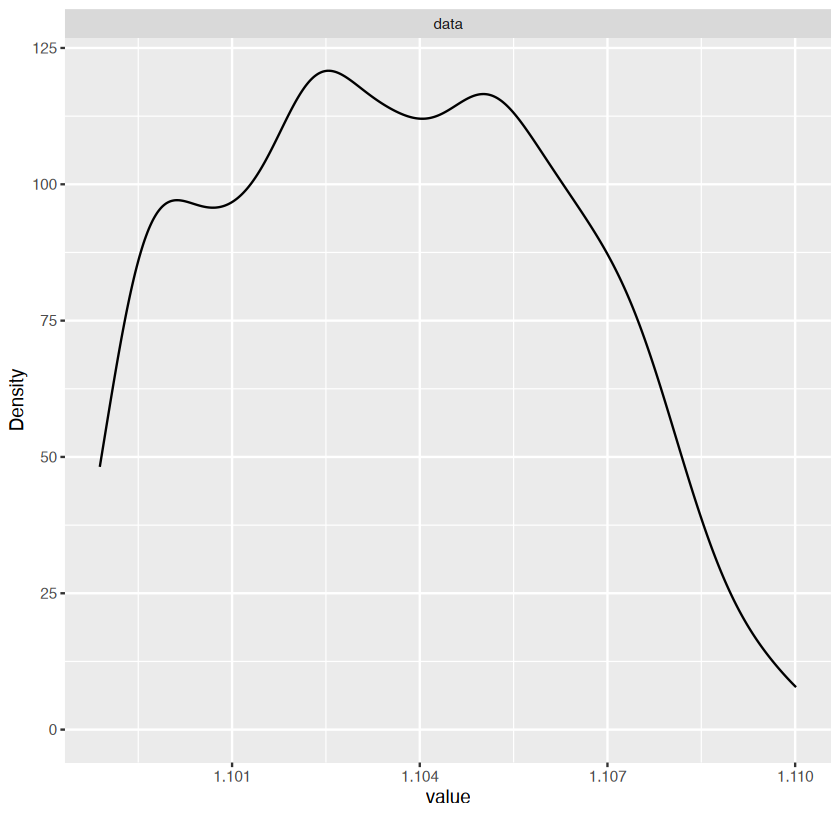

In [24]:
trans <- BoxCoxTrans(segData[, 2])
result <- predict(trans, segData[, 2])
plot_density(result)

In [25]:
trans

Box-Cox Transformation

1009 data points used to estimate Lambda

Input data summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  150.0   194.0   256.0   325.1   376.0  2186.0 

Largest/Smallest: 14.6 
Sample Skewness: 3.53 

Estimated Lambda: -0.9 


## 异常值

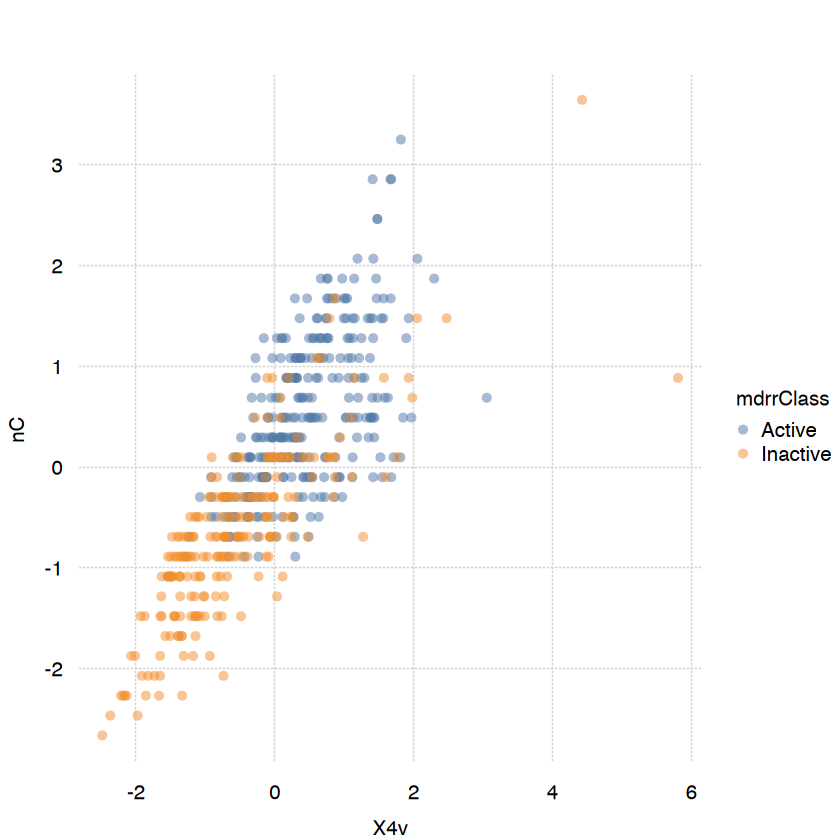

In [40]:
# 变换前的图形
data(mdrr)
plot_subset <- data.frame(scale(mdrrDescr[, c("nC", "X4v")]))

library(tinyplot)
tinytheme("clean2")
tinyplot(nC ~ X4v | mdrrClass, data = plot_subset, alpha = 0.5)

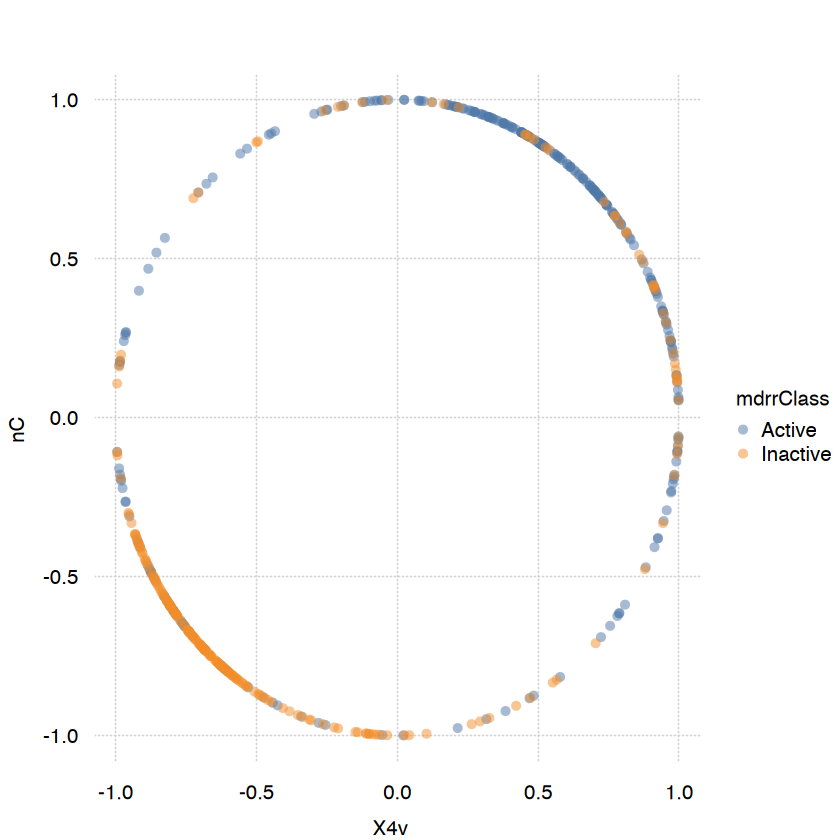

In [42]:
# 变换后的图形
transformed <- spatialSign(plot_subset)
transformed <- as.data.frame(transformed)

tinyplot(nC ~ X4v | mdrrClass, data = transformed, alpha = 0.5)

## 降维和特征提取

In [44]:
pr <- princomp(segData[, c("AvgIntenCh1", "EntropyIntenCh1")])
pr

Call:
princomp(x = segData[, c("AvgIntenCh1", "EntropyIntenCh1")])

Standard deviations:
     Comp.1      Comp.2 
163.9331505   0.5399109 

 2  variables and  1009 observations.

In [51]:
predict(pr) %>% head()

,Comp.1,Comp.2
2,-95.99292,0.2015033
3,-99.87800,0.3929021
4,-108.46216,0.8284726
12,-109.08984,0.8632237
15,-110.34821,1.0581260
16,-85.63246,0.1862144


In [66]:
# 基于loadings与数据手动计算scores
loadings <- pr$loadings
scores <- as.matrix(
  scale(
    segData[, c("AvgIntenCh1", "EntropyIntenCh1")],
    center = TRUE,
    scale = FALSE
  )
) %*% loadings

scores %>% head()

,Comp.1,Comp.2
2,-95.99292,0.2015033
3,-99.87800,0.3929021
4,-108.46216,0.8284726
12,-109.08984,0.8632237
15,-110.34821,1.0581260
16,-85.63246,0.1862144


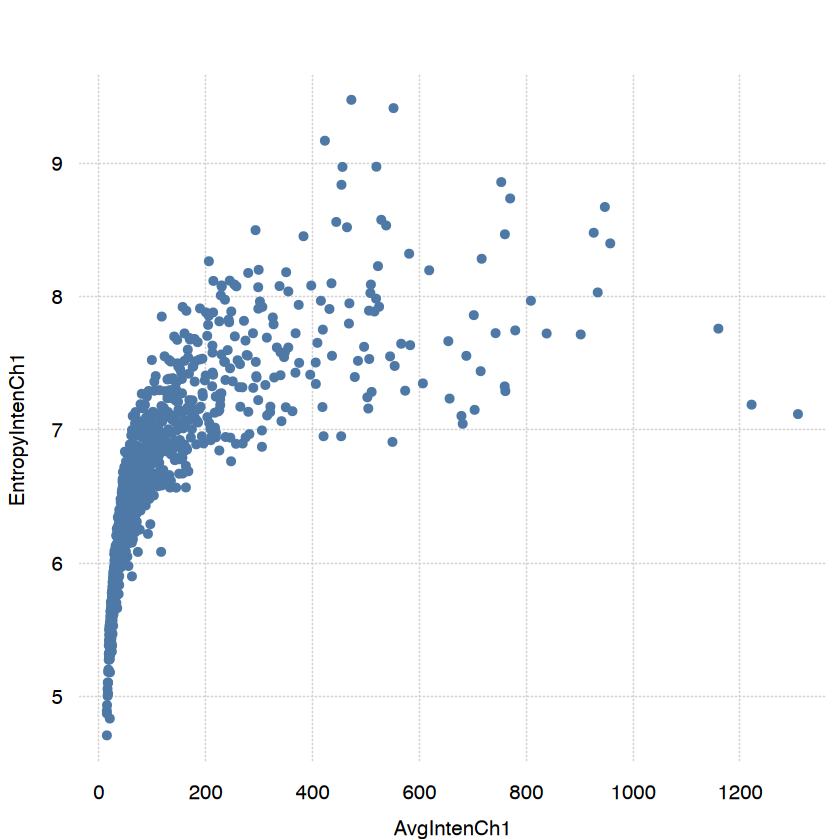

In [52]:
# 未降维前
tinyplot(EntropyIntenCh1 ~ AvgIntenCh1, data = segData)

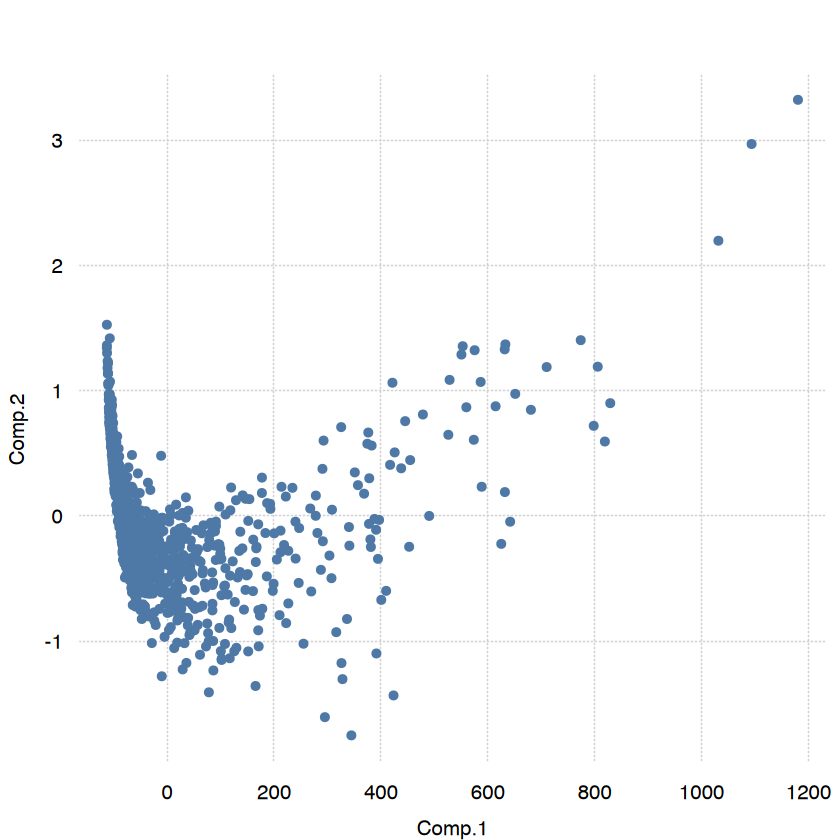

In [56]:
# 降维后
tinyplot(Comp.2 ~ Comp.1, data = as.data.frame(predict(pr)))

## 过滤

In [72]:
data(mdrr)
table(mdrrDescr$nR11)


  0   1   2 
501   4  23 

In [76]:
library(modelsummary)
datasummary_skim(mdrrDescr["nR11"])


+------+--------+--------------+------+-----+-----+--------+-----+---------------------------------------------------------------+
|      | Unique | Missing Pct. | Mean | SD  | Min | Median | Max | Histogram                                                     |
+======+========+==============+======+=====+=====+========+=====+===============================================================+
| nR11 | 3      | 0            | 0.1  | 0.4 | 0.0 | 0.0    | 2.0 | ![](tinytable_assets/idbhzpcwxzo9laplsn6kp2.png){ height=16 } |
+------+--------+--------------+------+-----+-----+--------+-----+---------------------------------------------------------------+ 

In [ ]:
# 检测零方差变量
nzv <- nearZeroVar(mdrrDescr, saveMetrics = TRUE)
nzv %>% filter(nzv) %>% head()

,freqRatio,percentUnique,zeroVar,nzv
,<dbl>,<dbl>,<lgl>,<lgl>
nTB,23.00000,0.3787879,FALSE,TRUE
nBR,131.00000,0.3787879,FALSE,TRUE
nI,527.00000,0.3787879,FALSE,TRUE
nR03,527.00000,0.3787879,FALSE,TRUE
nR08,527.00000,0.3787879,FALSE,TRUE
nR11,21.78261,0.5681818,FALSE,TRUE


In [82]:
dim(mdrrDescr)

[1] 528 342

In [83]:
# 去除零方差变量
nzv <- nearZeroVar(mdrrDescr)
nzv

[1]  22  31  32  34  38  41  42 259 262 263 264 266 267 270 271 272 273 274 276
[20] 277 278 279 280 281 282 283 284 285 286 287 288 327 328 330 331 333 334 335
[39] 336 337 338 339 340 341 342

In [84]:
filteredDescr <- mdrrDescr[, -nzv]
dim(filteredDescr)

[1] 528 297

In [85]:
correlations <- cor(mdrrDescr)
dim(correlations)

[1] 342 342

corrplot 0.95 loaded



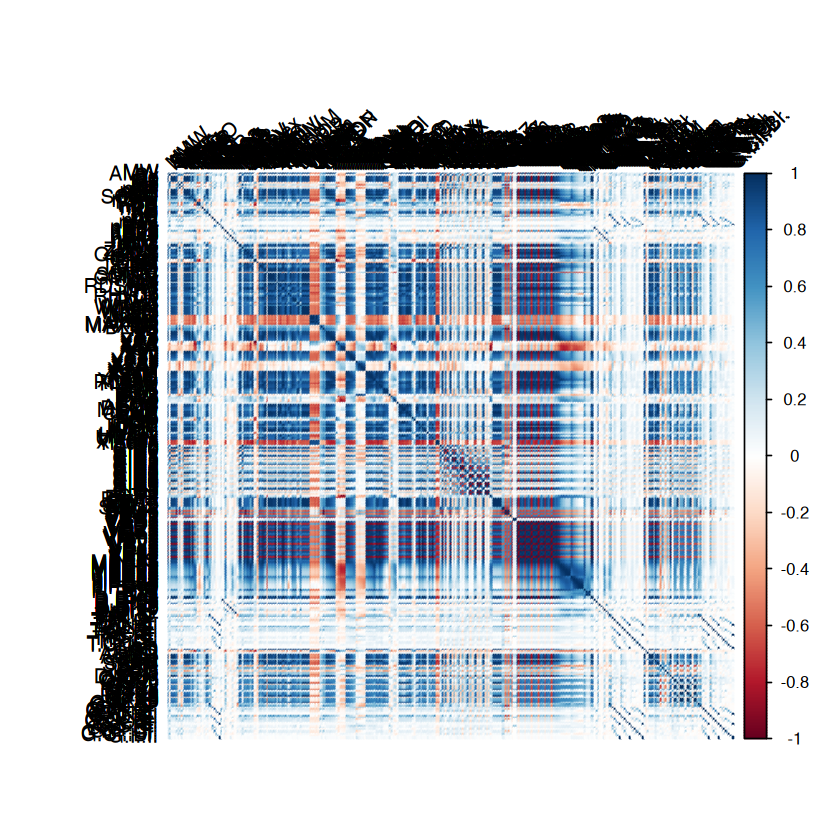

In [86]:
library(corrplot)
corrplot(correlations, method = "color", tl.col = "black", tl.srt = 45)

In [87]:
highCorr <- findCorrelation(correlations, cutoff = 0.75)
highCorr

[1]   5  12  13  14  16  24  25  33  41  44  45  46  47  49  50  51  52  54
 [19]  56  57  58  59  60  62  63  64  65  66  68  69  70  71  72  73  75  76
 [37]  77  78  79  80  81  82  83  84  85  86  90  91  92  95  97  98  99 100
 [55] 101 102 103 104 106 107 108 109 110 111 112 113 117 118 119 120 121 122
 [73] 123 124 125 126 127 128 129 130 131 132 133 134 139 141 142 143 144 145
 [91] 146 147 148 151 152 153 155 156 157 159 160 161 162 163 164 165 166 167
[109] 168 169 171 172 174 176 177 179 181 182 183 184 185 186 187 188 189 190
[127] 191 192 193 194 196 197 198 199 200 201 202 203 204 205 206 207 209 211
[145] 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
[163] 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
[181] 253 256 257 258 260 261 264 265 266 270 271 272 273 280 288 289 290 292
[199] 293 294 296 297 298 305 308 309 310 311 312 313 315 316 317 318 319 320
[217] 321 324 325 326 327 328 329 333 337 338 339 340   1   3   4   7   8   6
[235]  17  19  15  11  20  48  87  88  18 105 115 116  61 170 173 175 178 154
[253] 248 249 250 251 254  34  37  38  42  26  32  27  29  74 301 268 269 279
[271] 276 277 278 274 281 282 287 334

In [88]:
filteredSegData <- segData[, -highCorr]
dim(filteredSegData)

[1] 1009   16

## 共线性

In [90]:
ltfrDesign <- matrix(0, nrow = 6, ncol = 6)
ltfrDesign[, 1] <- c(1, 1, 1, 1, 1, 1)
ltfrDesign[, 2] <- c(1, 1, 1, 0, 0, 0)
ltfrDesign[, 3] <- c(0, 0, 0, 1, 1, 1)
ltfrDesign[, 4] <- c(1, 0, 0, 1, 0, 0)
ltfrDesign[, 5] <- c(0, 1, 0, 0, 1, 0)
ltfrDesign[, 6] <- c(0, 0, 1, 0, 0, 1)

ltfrDesign

1,1,0,1,0,0
1,1,0,0,1,0
1,1,0,0,0,1
1,0,1,1,0,0
1,0,1,0,1,0
1,0,1,0,0,1


In [93]:
comboInfo <- findLinearCombos(ltfrDesign)
comboInfo

$linearCombos
$linearCombos[[1]]
[1] 3 1 2

$linearCombos[[2]]
[1] 6 1 4 5


$remove
[1] 3 6

In [94]:
# 去除第3列和第6列
ltfrDesign[, -comboInfo$remove]

1,1,1,0
1,1,0,1
1,1,0,0
1,0,1,0
1,0,0,1
1,0,0,0


## 构造虚拟变量

In [95]:
data("cars", package = "caret")
head(cars)

,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
3,29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
4,30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
5,33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
6,30315.17,23635,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0


In [97]:
type <- c("convertible", "coupe", "hatchback", "sedan", "wagon")
cars$Type <- factor(apply(cars[, 14:18], 1, function(x) type[which(x == 1)]))

carSubset <- cars[sample(1:nrow(cars), 20), c(1, 2, 19)]

# 上面是数据生成过程，不重要，记住下面这个数据的样子即可！！
head(carSubset)

,Price,Mileage,Type
,<dbl>,<int>,<fct>
565,9654.06,19183,sedan
669,13681.70,10210,coupe
232,30443.88,15050,wagon
172,16283.96,26511,sedan
199,63913.12,18200,convertible
114,18348.90,23852,sedan


In [98]:
levels(carSubset$Type) # Type是一个因子型变量

[1] "convertible" "coupe"       "hatchback"   "sedan"       "wagon"

In [99]:
carSubset %>% glimpse()

Rows: 20
Columns: 3
$ Price   <dbl> 9654.06, 13681.70, 30443.88, 16283.96, 63913.12, 18348.90, 191~
$ Mileage <int> 19183, 10210, 15050, 26511, 18200, 23852, 10414, 4463, 17787, ~
$ Type    <fct> sedan, coupe, wagon, sedan, convertible, sedan, coupe, wagon, ~


In [103]:
simpleMod <- dummyVars(
  ~ Type,
  data = carSubset,
  levelsOnly = TRUE
)

simpleMod

Dummy Variable Object

Formula: ~Type
1 variables, 1 factors
Factor variable names will be removed
A less than full rank encoding is used

In [104]:
predict(simpleMod, newdata = carSubset) %>% head()

,convertible,coupe,hatchback,sedan,wagon
565,0,0,0,1,0
669,0,1,0,0,0
232,0,0,0,0,1
172,0,0,0,1,0
199,1,0,0,0,0
114,0,0,0,1,0


In [105]:
withInteraction <- dummyVars(~Mileage + Type + Mileage:Type,
                             data = carSubset,
                             levelsOnly = TRUE)
withInteraction

Dummy Variable Object

Formula: ~Mileage + Type + Mileage:Type
2 variables, 1 factors
Factor variable names will be removed
A less than full rank encoding is used

In [106]:
predict(withInteraction, head(carSubset))

,Mileage,convertible,coupe,hatchback,sedan,wagon,Mileage:Typeconvertible,Mileage:Typecoupe,Mileage:Typehatchback,Mileage:Typesedan,Mileage:Typewagon
565,19183,0,0,0,1,0,0,0,0,19183,0
669,10210,0,1,0,0,0,0,10210,0,0,0
232,15050,0,0,0,0,1,0,0,0,0,15050
172,26511,0,0,0,1,0,0,0,0,26511,0
199,18200,1,0,0,0,0,18200,0,0,0,0
114,23852,0,0,0,1,0,0,0,0,23852,0


## 多个预处理步骤放一起

In [107]:
library(AppliedPredictiveModeling)
data(schedulingData)
str(schedulingData)

'data.frame':	4331 obs. of  8 variables:
 $ Protocol   : Factor w/ 14 levels "A","C","D","E",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Compounds  : num  997 97 101 93 100 100 105 98 101 95 ...
 $ InputFields: num  137 103 75 76 82 82 88 95 91 92 ...
 $ Iterations : num  20 20 10 20 20 20 20 20 20 20 ...
 $ NumPending : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Hour       : num  14 13.8 13.8 10.1 10.4 ...
 $ Day        : Factor w/ 7 levels "Mon","Tue","Wed",..: 2 2 4 5 5 3 5 5 5 3 ...
 $ Class      : Factor w/ 4 levels "VF","F","M","L": 2 1 1 1 1 1 1 1 1 1 ...


In [ ]:
# 中心化、标准化、YeoJohnson变换
pp_hpc <- preProcess(schedulingData[, -8],
                     method = c("center", "scale", "YeoJohnson"))
pp_hpc

Created from 4331 samples and 7 variables

Pre-processing:
  - Yeo-Johnson transformation (5)
  - centered (5)
  - ignored (2)
  - scaled (5)

Lambda estimates for Yeo-Johnson transformation:
-0.08, -0.03, -1.05, -1.1, 1.44

In [109]:
# 应用于数据
transformed <- predict(pp_hpc, newdata = schedulingData[, -8])
head(transformed)

,Protocol,Compounds,InputFields,Iterations,NumPending,Hour,Day
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,E,1.2289592,-0.6324580,-0.0615593,-0.554123,0.004586516,Tue
2,E,-0.6065826,-0.8120473,-0.0615593,-0.554123,-0.043733201,Tue
3,E,-0.5719534,-1.0131504,-2.7894869,-0.554123,-0.034967177,Thu
4,E,-0.6427737,-1.0047277,-0.0615593,-0.554123,-0.964170752,Fri
5,E,-0.5804713,-0.9564504,-0.0615593,-0.554123,-0.902085020,Fri
6,E,-0.5804713,-0.9564504,-0.0615593,-0.554123,0.698108782,Wed


In [110]:
# 进行中心化、标准化、YeoJohnson、nzv
pp_no_nzv <- preProcess(schedulingData[, -8], 
                        method = c("center", "scale", "YeoJohnson", "nzv"))
pp_no_nzv

Created from 4331 samples and 7 variables

Pre-processing:
  - Yeo-Johnson transformation (4)
  - centered (4)
  - ignored (2)
  - removed (1)
  - scaled (4)

Lambda estimates for Yeo-Johnson transformation:
-0.08, -0.03, -1.05, 1.44

In [111]:
predict(pp_no_nzv, newdata = schedulingData[1:6, -8])

,Protocol,Compounds,InputFields,Iterations,Hour,Day
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,E,1.2289592,-0.6324580,-0.0615593,0.004586516,Tue
2,E,-0.6065826,-0.8120473,-0.0615593,-0.043733201,Tue
3,E,-0.5719534,-1.0131504,-2.7894869,-0.034967177,Thu
4,E,-0.6427737,-1.0047277,-0.0615593,-0.964170752,Fri
5,E,-0.5804713,-0.9564504,-0.0615593,-0.902085020,Fri
6,E,-0.5804713,-0.9564504,-0.0615593,0.698108782,Wed
